In [1]:
from getdist import plots, MCSamples, loadMCSamples
import getdist
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('text', usetex=True)
#from getdist.styles.tab10 import style_name
#plots.set_active_style(style_name)

In [2]:
def add_S8(chains_to_change):
    """ Creates S8 parameter in the chain desired
    """
    for ch in chains_to_change:
        ch.addDerived(np.sqrt(ch['Omega_m']/0.3)*ch['sigma8'], name='S8', label='S_8')
    return chains_to_change

In [3]:
path_to_chains = '/mnt/zfsusers/anyabua/IA/mcmc/chains/'
amplabel = np.array(['1','075', '050', '025', '0', '025', '050', '075', '1'])
sign = np.array([-1,-1, -1, -1,0, 1, 1, 1,1])
chains = []
for sa, a in zip(sign, amplabel):
    if sa < 0:
        chains.append(loadMCSamples(path_to_chains + f"TATTFIT_TO_PHYSPERT/TATTAMP_NEG0P{a}_PHYSPERT/TATTAMP_NEG0P{a}_PHYSPERT", 
                                    settings={'ignore_rows': 0.3}))
    if sa == 0:
        chains.append(loadMCSamples(path_to_chains + f"TATTFIT_TO_PHYSPERT/TATTAMP_0_PHYSPERT/TATTAMP_0_PHYSPERT", 
                                    settings={'ignore_rows': 0.3}))
    if sa > 0: 
        chains.append(loadMCSamples(path_to_chains + f"TATTFIT_TO_PHYSPERT/TATTAMP_POS0P{a}_PHYSPERT/TATTAMP_POS0P{a}_PHYSPERT", 
                                    settings={'ignore_rows': 0.3}))
mainchain = add_S8(chains)

In [4]:
np.arange(-1,1.25, 0.25)

array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ])

In [5]:
256/10

25.6

In [6]:
from matplotlib import cm
a = cm.magma.colors
print(len(a))
colors= [a[4], a[28], a[56], a[84], a[112],a[140], a[168],a[190],a[208], a[236]]

256


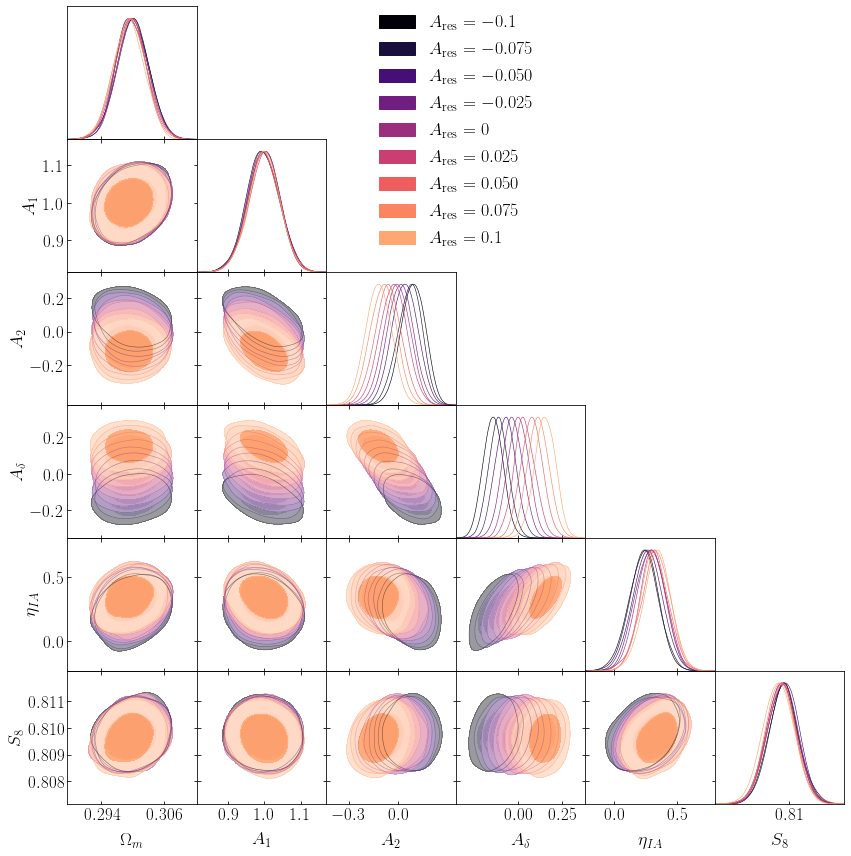

In [16]:
names = ['Omega_m','bias_a1','bias_a2','bias_ad', 'limber_eta_IA', 'S8']
amps = ['-0.1' , '-0.075', '-0.050' , '-0.025',  '0'  ,  '0.025',  '0.050' ,  '0.075',  '0.1' ]
legend_labels = [r'$A_{\rm res}='+ f'{amp}$' for amp in amps]
g = plots.get_subplot_plotter()
g.settings.legend_fontsize = 21
g.settings.figure_legend_frame = False
g.settings.axes_labelsize = 21
g.settings.axes_fontsize= 20
linearg = [{'ls':'-', 'color': cl} for cl in colors[:-1]] 
g.triangle_plot(mainchain, names, filled=True,line_args =linearg,contour_colors= colors[:-1],legend_labels= legend_labels)
plt.savefig('TATTparams_contour_physpert.pdf', bbox_inches = 'tight')